In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [5]:
data = pd.read_csv(r"C:\Users\kelvin\Downloads\machine-learning-in-python\Section 1\7_First regression in Python\Course notes\First regression in Python Dataset\1.01. Simple linear regression.csv")
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [31]:
y = data["GPA"]
X = data["SAT"]

In [29]:
#step 1

In [23]:
#feature =["SAT"]
#X = data[feature]

In [30]:
#step2

In [44]:
x_matrix = X.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [45]:
X.shape

(84,)

In [46]:
y.shape

(84,)

In [47]:
reg = LinearRegression()

In [49]:
reg.fit(x_matrix,y)

LinearRegression()

R-squares

In [51]:
reg.score(x_matrix,y)

0.40600391479679765

In [52]:
reg.coef_

array([0.00165569])

In [54]:
reg.intercept_

0.275040299660279

reg.predict(1740)

In [59]:
new_data = pd.DataFrame([1740,1700],columns = ["SAT"])
new_data

,SAT
0,1740
1,1700


In [60]:
reg.predict(new_data)

D:\Stats_software\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.08970998])

In [ ]:
new_data["predicted_GPA"]= reg.predict(new_data)
new_data

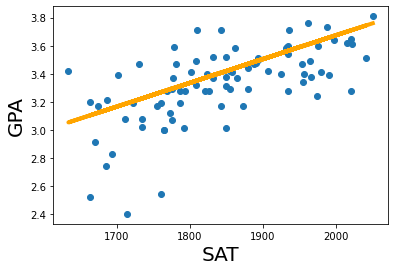

In [69]:
plt.scatter(X,y)
yhat = 0.0017*X + 0.275
fig = plt.plot(X,yhat,lw=4,c="orange",label="regression line")
plt.xlabel("SAT",fontsize=20)
plt.ylabel("GPA",fontsize=20)
plt.show()

Multiple Linear Regression

In [71]:
data1 = pd.read_csv(r"C:\Users\kelvin\Downloads\machine-learning-in-python\Section 2\6_Multiple linear regression\Course notes\Multiple linear regression Dataset\1.02. Multiple linear regression.csv")
data1

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [73]:
data1.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [80]:
xx = data1[["SAT","Rand 1,2,3"]]
yy =data1["GPA"]

In [81]:
reg1 = LinearRegression()
reg1.fit(xx,yy)

LinearRegression()

In [82]:
reg1.coef_

array([ 0.00165354, -0.00826982])

In [83]:
reg1.intercept_

0.29603261264909353

In [84]:
#Calculating R-squared

In [85]:
reg1.score(xx,yy)

0.4066811952814282

 $R^2_{adj.} = 1-(1-R^2)* \frac{n-1}{n-p-1}$

In [92]:
xx.shape

(84, 2)

In [96]:
r2 = reg1.score(xx,yy)
n = xx.shape[0]
p= xx.shape[1]

adjusted_r2 = 1-(1-r2) * (n-1)/(n-p-1)
adjusted_r2

0.39203134825134

In [98]:
from sklearn.feature_selection import f_regression

In [99]:
f_regression(xx,yy)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [103]:
p_values = f_regression(xx,yy)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [104]:
p_values.round(3)

array([0.   , 0.676])

In [114]:
reg_summary = pd.DataFrame(data = xx.columns.values,columns = ["Features"])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [118]:
reg_summary["Coefficients"] = reg1.coef_
reg_summary["P-values"] = p_values.round(2)

In [119]:
reg_summary

,Features,Coefficients,P-values
0,SAT,0.001654,0.00
1,"Rand 1,2,3",-0.008270,0.68


In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scaler = StandardScaler()

In [130]:
scaler.fit(xx)

StandardScaler()

In [132]:
xx_scaled = scaler.transform(xx)

In [134]:
xx_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

In [156]:
reg1 = LinearRegression()

In [161]:
reg1.fit(xx_scaled,yy)

LinearRegression()

In [162]:
reg1.coef_

array([ 0.17181389, -0.00703007])

In [165]:
reg_summary = pd.DataFrame([["Bias"],["SAT"],["Rand 1,2,3"]],columns =["Fetures"])
reg_summary["weights"] =  reg1.intercept_,reg1.coef_[0],reg1.coef_[1]

In [166]:
reg_summary

,Fetures,weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


In [173]:
data = pd.DataFrame([["Kelvin"],["Joseph"],["Evans"]],columns =["Names"])
data["Marks"] = pd.DataFrame([78,67,60])
data

In [178]:
da = pd.DataFrame([["Kelvin",78],["Joseph",67],["Evans",60]],columns =["Names","Marks"])
da

,Names,Marks
0,Kelvin,78
1,Joseph,67
2,Evans,60


In [174]:
data

,Names,Marks
0,Kelvin,78
1,Joseph,67
2,Evans,60


In [175]:
#Prediction

In [176]:
data_new = pd.DataFrame([[1700,2],[1000,1]],columns = ["SAT","Rand 1,2,3"])
data_new

,SAT,"Rand 1,2,3"
0,1700,2
1,1000,1


In [179]:
reg.predict(data_new)

D:\Stats_software\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([295.39979563, 175.13710077])

In [180]:
data_new_scaled = scaler.transform(data_new)
data_new_scaled

array([[-1.39811928, -0.07002087],
       [-8.13493924, -1.24637147]])

In [181]:
reg1.predict(data_new_scaled)

array([3.09051403, 1.94130459])

What i we removed the Random 1,2,3' variable

In [187]:
reg_simple = LinearRegression()
x_simple_matrix = xx_scaled[:,0].reshape(-1,1)
reg_simple.fit(x_simple_matrix,yy)

LinearRegression()

In [192]:
reg_simple.predict(data_new_scaled[:,0].reshape(-1,1))

array([3.08970998, 1.93072835])

Split the dataset

In [242]:
import numpy as np
from sklearn.model_selection import train_test_split

In [243]:
a = np.arange(1,101)

In [244]:
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [245]:
b = np.arange(1,84)
b

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

In [246]:
train_test_split(a)

[array([ 25,  59,  44,  84,  22,  69,  23,  30,  16,  17,  83,  88,   2,
         33,  54,  13,   6,  68,  27,  12,  41,  67,  11,  72,  89,  98,
         24,   3,  56,  50,  48,  45,  95,  21,  63,  37,  35,  57,  36,
         39,  97,  20,  47,  15,  31, 100,  96,  75,   4,  32,  92,  43,
         14,  93,  81,  87,  29,  74,  76,  79,  85,  82,  91,   1,   7,
         71,  70,  49,  52,  94,  42,   9,  73,  60,  46]),
 array([19, 34, 26, 51, 62,  8, 90, 64, 40, 66, 38, 78, 28,  5, 65, 58, 86,
        80, 53, 61, 18, 10, 55, 77, 99])]

In [255]:
a_train,a_test= train_test_split(a, test_size =0.2,random_state = 42)

In [256]:
Explore result

SyntaxError: invalid syntax (3234813341.py, line 1)

In [257]:
a_train.shape,a_test.shape

((80,), (20,))

In [258]:
a_train

array([ 56,  89,  27,  43,  70,  16,  41,  97,  10,  73,  12,  48,  86,
        29,  94,   6,  67,  66,  36,  17,  50,  35,   8,  96,  28,  20,
        82,  26,  63,  14,  25,   4,  18,  39,   9,  79,   7,  65,  37,
        90,  57, 100,  55,  44,  51,  68,  47,  69,  62,  98,  80,  42,
        59,  49,  99,  58,  76,  33,  95,  60,  64,  85,  38,  30,   2,
        53,  22,   3,  24,  88,  92,  75,  87,  83,  21,  61,  72,  15,
        93,  52])

In [259]:
a_train

array([ 56,  89,  27,  43,  70,  16,  41,  97,  10,  73,  12,  48,  86,
        29,  94,   6,  67,  66,  36,  17,  50,  35,   8,  96,  28,  20,
        82,  26,  63,  14,  25,   4,  18,  39,   9,  79,   7,  65,  37,
        90,  57, 100,  55,  44,  51,  68,  47,  69,  62,  98,  80,  42,
        59,  49,  99,  58,  76,  33,  95,  60,  64,  85,  38,  30,   2,
        53,  22,   3,  24,  88,  92,  75,  87,  83,  21,  61,  72,  15,
        93,  52])

In [252]:
a_test

array([84, 54, 71, 46, 45, 40, 23, 81, 11,  1, 19, 31, 74, 34, 91,  5, 77,
       78, 13, 32])